# ASSIGNMENT - GAUTAM MISHRA

## PERFORM LOGISTIC REGRESION ON CUSTOMER CHURN PREDICTION

### Inporting Analytics,Visualization Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Basic Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().any()

False

### Dropping unwanted column

In [6]:
df.drop('RowNumber',inplace=True,axis=1)

In [7]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Differentiating between categorical column numerical column

In [9]:
num_col=df.select_dtypes(include=['int','float']).columns
num_col

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [10]:
cat_col=df.select_dtypes(include='O').columns
cat_col

Index(['Surname', 'Geography', 'Gender'], dtype='object')

### Detecting outliers

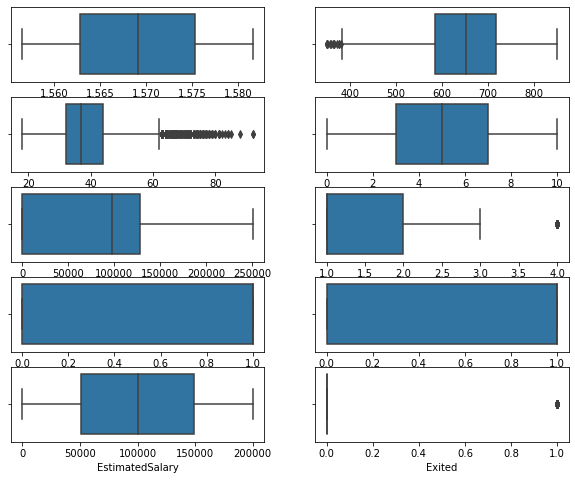

In [11]:
plt.figure(figsize=(10,8))
count=1
for i in num_col:
    plt.subplot(5,2,count)
    sns.boxplot(x=df[i],data=df)
    count+=1
plt.show()

### Handling outliers in age column

<AxesSubplot:xlabel='Age'>

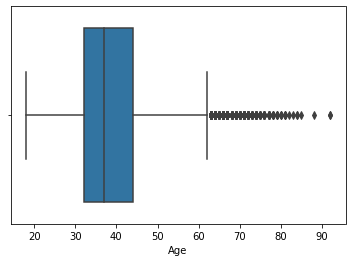

In [12]:
sns.boxplot(df['Age'])

In [13]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

<AxesSubplot:xlabel='Age', ylabel='Density'>

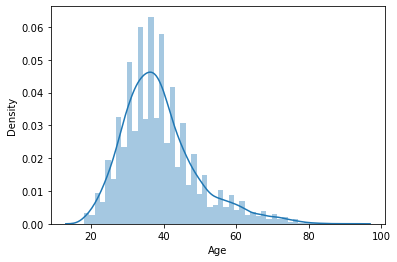

In [14]:
sns.distplot(df['Age'])

In [15]:
df[df['Age']>58]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
42,15687946,Osborne,556,France,Female,61,2,117419.35,1,1,1,94153.83,0
44,15684171,Bianchi,660,Spain,Female,61,5,155931.11,1,1,1,158338.39,0
58,15623944,T'ien,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,15814690,Chukwujekwu,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9879,15669414,Pisano,486,Germany,Male,62,9,118356.89,2,1,0,168034.83,1
9894,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0
9897,15810563,Ho,678,Spain,Female,61,8,0.00,2,1,1,159938.82,0


In [16]:
df=df[df['Age']<58]

<AxesSubplot:xlabel='Age'>

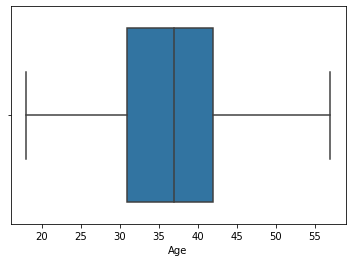

In [17]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

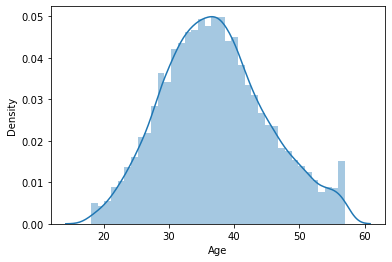

In [18]:
sns.distplot(df['Age'])

### Multivariate plot - relationship between all numerical data

<AxesSubplot:>

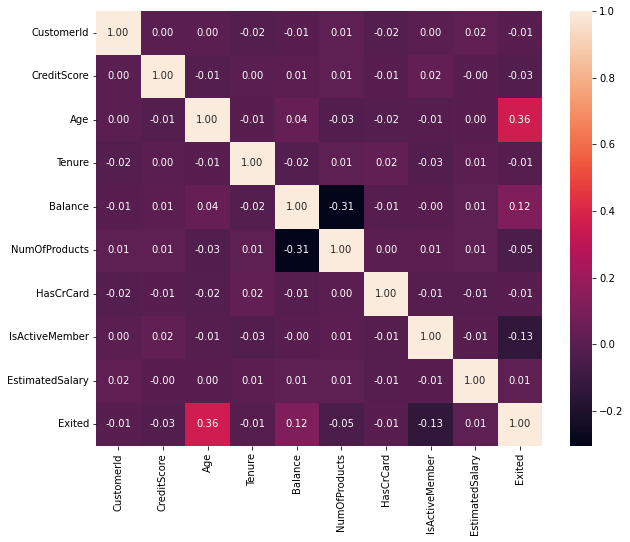

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

### Handling outliers from CreditScore column

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

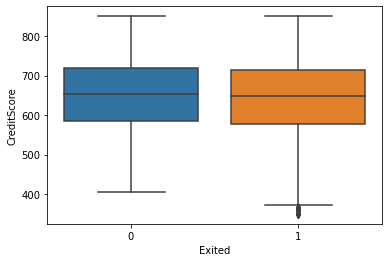

In [20]:
sns.boxplot(data=df,x='Exited',y='CreditScore')

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

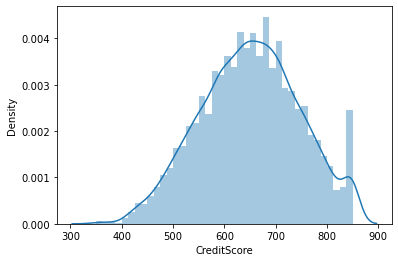

In [21]:
sns.distplot(df['CreditScore'])

In [22]:
df[df['CreditScore']<440]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
29,15656300,Lucciano,411,France,Male,29,0,59697.17,2,1,1,53483.21,0
79,15803136,Postle,416,Germany,Female,41,10,122189.66,2,1,0,98301.61,0
99,15633059,Fanucci,413,France,Male,34,9,0.00,2,0,0,6534.18,0
125,15627360,Fuller,432,France,Male,42,9,152603.45,1,1,0,110265.24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9357,15814405,Chesnokova,418,France,Female,46,9,0.00,1,1,1,81014.50,1
9407,15652835,Liang,419,Spain,Female,27,2,121580.42,1,0,1,134720.51,0
9522,15664504,Beede,418,France,Male,35,7,0.00,2,1,1,88878.15,0
9624,15668309,Maslow,350,France,Female,40,0,111098.85,1,1,1,172321.21,1


In [23]:
df=df[df['CreditScore']>440]

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

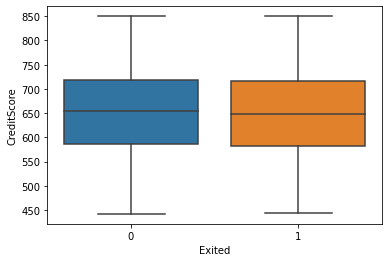

In [24]:
sns.boxplot(data=df,x='Exited',y='CreditScore')

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

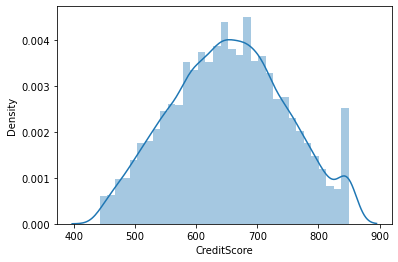

In [25]:
sns.distplot(df['CreditScore'])

### Handling NumOfProduct columns outlier

In [26]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [27]:
df['NumOfProducts'].value_counts()

1    4644
2    4281
3     241
4      52
Name: NumOfProducts, dtype: int64

In [28]:
df[df['NumOfProducts']>3]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1254,15610383,Dumetolisa,628,France,Female,46,1,46870.43,4,1,0,31272.14,1
1469,15670374,Wright,819,Germany,Female,49,1,120656.86,4,0,0,166164.30,1
1488,15625824,Kornilova,596,Spain,Male,30,6,121345.88,4,1,0,41921.75,1
1701,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1
1876,15664754,Steele,640,Germany,Male,39,9,131607.28,4,0,1,6981.43,1
2124,15603851,Galkin,704,France,Male,32,7,127785.17,4,0,0,184464.70,1
2196,15791700,Ugochukwutubelum,773,Germany,Male,47,2,118079.47,4,1,1,143007.49,1
2285,15783615,Ramos,630,Germany,Male,50,3,129370.91,4,1,1,47775.34,1
2462,15704442,Fleming,672,France,Female,53,9,169406.33,4,1,1,147311.47,1
2499,15634974,Seppelt,614,France,Female,37,8,75150.34,4,0,1,131766.67,1


In [29]:
df=df[df['NumOfProducts']<3]

### Boxplot of all numerical columns

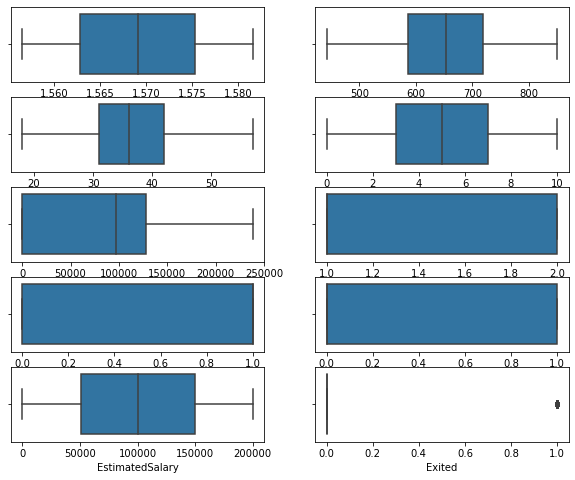

In [30]:
plt.figure(figsize=(10,8))
count=1
for i in num_col:
    plt.subplot(5,2,count)
    sns.boxplot(x=df[i],data=df)
    count+=1
plt.show()

### Univariate distribution plot of  numerical columns

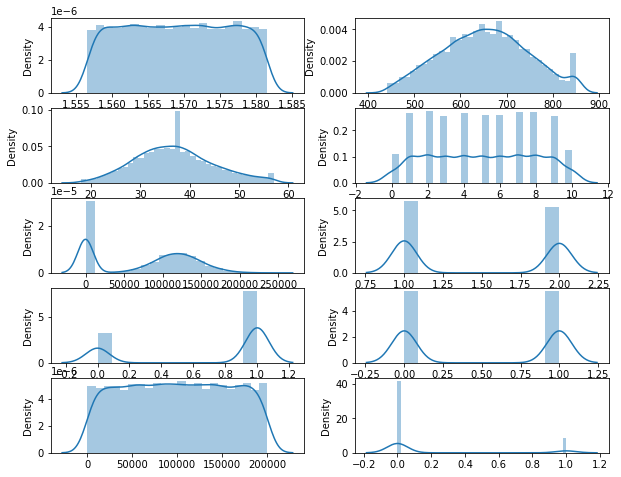

In [31]:
plt.figure(figsize=(10,8))
count=1
for i in num_col:
    plt.subplot(5,2,count)
    sns.distplot(x=df[i])
    count+=1
plt.show()

### Univariate count plot of categorical columns

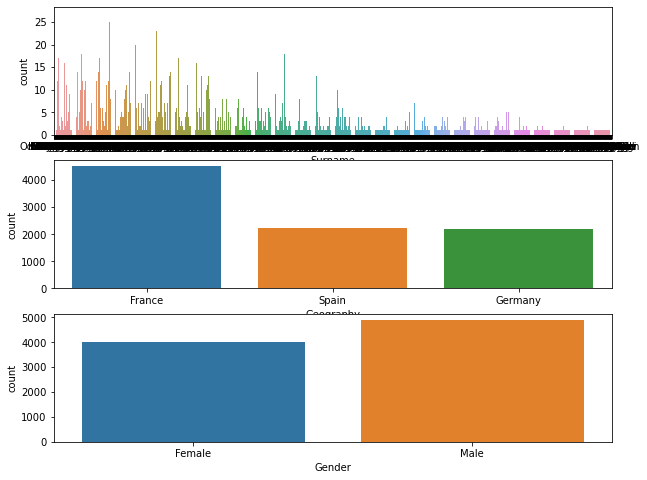

In [32]:
plt.figure(figsize=(10,8))
count=1
for i in cat_col:
    plt.subplot(3,1,count)
    sns.countplot(x=df[i],data=df)
    count+=1
plt.show()

### Multivariate plot - relationship between all numerical data

<AxesSubplot:>

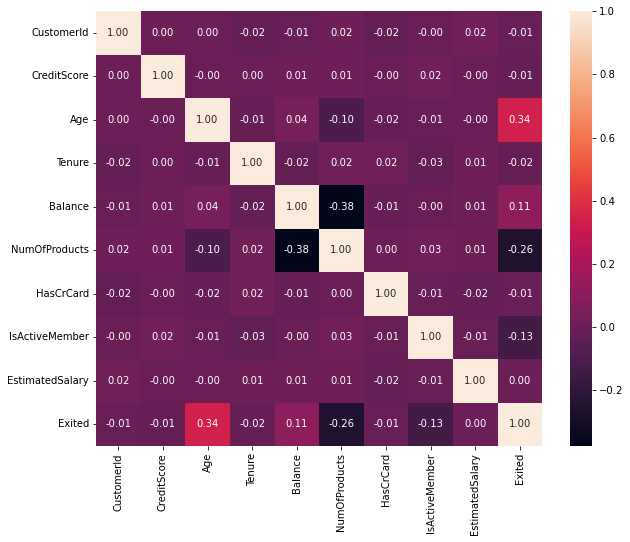

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

### Encoding Gender categorical column into numerical 0 and 1

In [34]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [35]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [36]:
cat_col=df.select_dtypes(include='O').columns
cat_col

Index(['Surname', 'Geography'], dtype='object')

### Encoding categorical columns to numerical column using LabelEncoder

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le=LabelEncoder()

In [39]:
for i in cat_col:
    df[i]=le.fit_transform(df[i])

### Taking X independent variable and y dependent variable

In [40]:
X=df.iloc[:,:-1]

In [41]:
y=df.iloc[:,-1]

In [42]:
from sklearn.model_selection import train_test_split

### Providing data for training and testing

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [44]:
X_train.shape

(7140, 12)

In [45]:
X_test.shape

(1785, 12)

In [46]:
y_train.shape

(7140,)

In [47]:
y_test.shape

(1785,)

### Feature Scaling -
standardizing the data such that transformed feature has mean 0 and standard deviation of 1 using StandardScalar

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [50]:
X_train

array([[ 0.22074189, -0.26346399, -0.61517658, ...,  0.65487198,
         1.00056038, -0.83822764],
       [-0.15576181, -0.43680568,  1.52254412, ...,  0.65487198,
         1.00056038, -0.94092282],
       [ 0.40204982, -1.15655052, -0.83002288, ...,  0.65487198,
        -0.99943993, -1.57601266],
       ...,
       [-0.11528234,  0.2201342 , -0.1317724 , ...,  0.65487198,
         1.00056038, -0.20545342],
       [-0.92487186, -1.32109951,  0.01862001, ...,  0.65487198,
        -0.99943993, -0.44770567],
       [-0.2428498 ,  0.42236617,  0.77058207, ...,  0.65487198,
        -0.99943993, -0.62943438]])

In [51]:
X_test

array([[ 0.56888489, -0.30114697,  0.27643557, ...,  0.65487198,
        -0.99943993,  1.50451162],
       [ 0.27171037, -1.58362425,  1.28621319, ..., -1.52701601,
        -0.99943993,  0.0229178 ],
       [ 0.66211583,  1.01650109, -1.87202744, ..., -1.52701601,
        -0.99943993,  1.41125859],
       ...,
       [ 0.72562097,  1.04413527, -0.12103008, ...,  0.65487198,
        -0.99943993, -0.68867722],
       [ 0.84425955, -1.1892091 ,  0.24420863, ...,  0.65487198,
        -0.99943993, -1.17295176],
       [ 1.14247878,  0.18873172, -0.67963047, ...,  0.65487198,
         1.00056038,  0.7160371 ]])

### Model Building

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
reg=LogisticRegression()
reg.fit(X_train,y_train)
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

### Evaluation

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [55]:
print('Train Data')
print(confusion_matrix(y_train,y_pred_train))
print('Test Data')
print(confusion_matrix(y_test,y_pred_test))

Train Data
[[5702  187]
 [ 861  390]]
Test Data
[[1454   46]
 [ 195   90]]


### Checking Accuracy

In [56]:
print('Train Data')
print(accuracy_score(y_train,y_pred_train))
print('Test Data')
print(accuracy_score(y_test,y_pred_test))

Train Data
0.8532212885154061
Test Data
0.8649859943977591


### Predicting probability of training and testingdata

In [57]:
y_train_proba=reg.predict_proba(X_train)[:,1]
y_train_proba

array([0.08613312, 0.04662503, 0.05568472, ..., 0.01338133, 0.69888312,
       0.66778746])

In [58]:
y_test_proba=reg.predict_proba(X_test)[:,1]
y_test_proba

array([0.18157576, 0.35212118, 0.03441637, ..., 0.52105319, 0.28944931,
       0.04985502])

### Classisication Report

In [59]:
from sklearn.metrics import classification_report

In [60]:
print('Train Data')
print(classification_report(y_train,y_pred_train))
print('Test Data')
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      5889
           1       0.68      0.31      0.43      1251

    accuracy                           0.85      7140
   macro avg       0.77      0.64      0.67      7140
weighted avg       0.84      0.85      0.83      7140

Test Data
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1500
           1       0.66      0.32      0.43       285

    accuracy                           0.86      1785
   macro avg       0.77      0.64      0.68      1785
weighted avg       0.85      0.86      0.84      1785



### PR Curve

In [61]:
from sklearn.metrics import precision_recall_curve

In [62]:
p,r,th=precision_recall_curve(y_train,y_train_proba)

In [63]:
p.shape

(7141,)

In [64]:
r.shape

(7141,)

In [65]:
th.shape

(7140,)

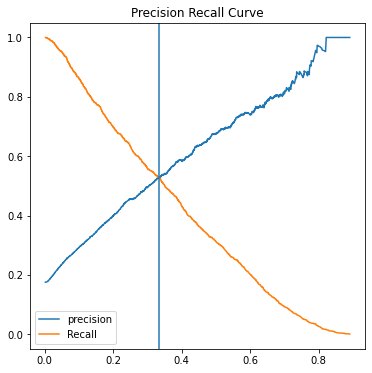

In [66]:
plt.figure(figsize=(6,6))
sns.lineplot(x=th,y=p[:-1],label='precision')
sns.lineplot(x=th,y=r[:-1],label='Recall')
plt.title('Precision Recall Curve')
plt.axvline(0.335)
plt.show()

### Confusion Matrix

In [67]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,f1_score 

In [68]:
def metrics(y_actual,y_proba,th):
    y_pred_temp=[1 if p>th else 0 for p in y_proba]
    accuracy=accuracy_score(y_actual,y_pred_temp)
    recall=recall_score(y_actual,y_pred_temp)
    precision=precision_score(y_actual,y_pred_temp)
    f1=f1_score(y_actual,y_pred_temp)
    roc_auc=roc_auc_score(y_actual,y_pred_temp)
    return {"Accuracy":round(accuracy,2),'Recall':round(recall,2),'Precision':round(precision,2),'F1_Score':round(f1,2),'ROC_AUC':round(roc_auc,2)}

In [69]:
print("Train Data")
print(metrics(y_train,y_train_proba,0.335))
print("Test Data")
print(metrics(y_test,y_test_proba,0.335))

Train Data
{'Accuracy': 0.83, 'Recall': 0.53, 'Precision': 0.53, 'F1_Score': 0.53, 'ROC_AUC': 0.71}
Test Data
{'Accuracy': 0.84, 'Recall': 0.5, 'Precision': 0.5, 'F1_Score': 0.5, 'ROC_AUC': 0.7}


### ROC-AUC Curve

In [70]:
from sklearn.metrics import roc_curve,auc

In [71]:
fpr,tpr,th=roc_curve(y_train,y_train_proba)

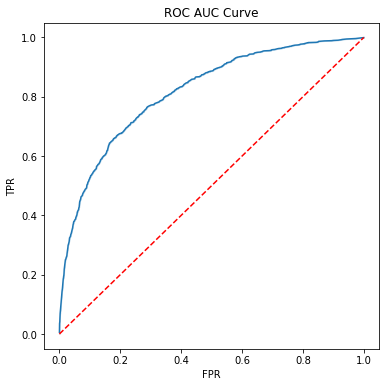

In [72]:
plt.figure(figsize=(6,6))
sns.lineplot(x=fpr,y=tpr)
sns.lineplot(x=[0.0,1],y=[0.0,1],color='red',linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC AUC Curve')
plt.show()

In [73]:
auc(fpr,tpr)

0.8164447555557185